# Explorando os dados da Central Nacional de Denúncias da Safernet

**Sobre os dados explorados:**

A partir da planilha original os dados foram divididos em 3 arquivos e preprocessados (nesse Notebook)[https://github.com/DeixeViver/eko-dados/blob/master/Notebooks/tratamento_indicadores_cnd.ipynb] resultando nos arquivos abaixo:

- cnd_violacao.csv que tem os dados sobre a quantidade de denúnicas por tempo e tipo de violação.
- cnd_idioma.csv que tem os dados sobre a quantidade de denúnicas por tempo e idioma.
- cnd_dominio.csv que tem os dados sobre a quantidade de denúnicas por tempo e domínio da página denunciada. Os domínios estão mascarados por uma questão de segurança e estão nesse formato desde o arquivo original recebido. A máscara aplicada permite que nós vejamos apenas os "radicais" dos sites e isso é o suficente para análisar, por exemplo quais os domínios com maior quantidade de denúncia.

**indicadores_cnd_violacao.csv:**
- 'Violação': Tipo de violação denunciada *(Apologia e Incitação a crimes contra a Vida, Homofobia, Intolerância Religiosa, Maus Tratos Contra Animais, Neo Nazismo, Não classificado, Pornografia Infantil, Racismo, Tráfico de Pessoas, Violência ou Discriminação contra Mulheres e Xenofobia)*
- 'Total': Total de todas as denúncias independente se foram duplicadas ou não.
- 'Mês': Nome mês referente ao período da denúncia.
- 'Mês Número': Número do mês referente ao período da denúncia.
- 'Ano': Ano referente ao período da denúncia.

**indicadores_cnd_idioma.csv:**
- 'Idioma': Idioma da página denunciada *(dutch, english, farsi, french, german, pinyin, portuguese, russian, spanish, swedish)*.
- 'Total': Total de todas as denúncias independente se foram duplicadas ou não.
- 'Mês': Nome mês referente ao período da denúncia.
- 'Mês Número': Número do mês referente ao período da denúncia.
- 'Ano': Ano referente ao período da denúncia.

**indicadores_cnd_dominio.csv:**
- 'Domínio': Parte do endereço da página denunciada *(facebook.com, google.com.br, imgsrc.ru, instagram.com, orkut.com, orkut.com.br, twitter.com, uol.com.br, xvideos.com, youtube.com)*.
- 'Total': Total de todas as denúncias independente se foram duplicadas ou não.
- 'Mês': Nome mês referente ao período da denúncia.
- 'Mês Número': Número do mês referente ao período da denúncia.
- 'Ano': Ano referente ao período da denúncia.

### 1 - Sobre as bibliotecas

In [40]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9, 9)

### 2 - Importando os dados

In [41]:
violacao = pd.read_csv('../dados/indicadores_cnd_violacao_preprocessado.csv')
violacao.head(5)

,Violação,Total de Denúncias,Mês,Mês Número,Ano
0,Não classificado,0,Janeiro,1,2006
1,Homofobia,2,Janeiro,1,2006
2,Neo Nazismo,8,Janeiro,1,2006
3,Tráfico de Pessoas,0,Janeiro,1,2006
4,Apologia e Incitação a crimes contra a Vida,2,Janeiro,1,2006


In [42]:
idioma = pd.read_csv('../dados/indicadores_cnd_idioma_preprocessado.csv')
idioma.head(5)

,Idioma,Total de Denúncias,Mês,Mês Número,Ano
0,portuguese,56,Janeiro,1,2006
1,french,10,Janeiro,1,2006
2,farsi,3,Janeiro,1,2006
3,swedish,0,Janeiro,1,2006
4,russian,9,Janeiro,1,2006


In [43]:
dominio = pd.read_csv('../dados/indicadores_cnd_dominio_preprocessado.csv')
dominio.head(5)

,Domínio,Total de Denúncias,Mês,Mês Número,Ano
0,geocities.com,13,Janeiro,1,2006
1,yahoo.com,4,Janeiro,1,2006
2,freepichosting.info,11,Janeiro,1,2006
3,wol.bz,18,Janeiro,1,2006
4,orkut.com,205,Janeiro,1,2006


In [44]:
violacao.Ano = violacao.Ano.astype(object)
violacao['Mês Número'] = violacao['Mês Número'].astype(object)
violacao.dtypes

Violação              object
Total de Denúncias     int64
Mês                   object
Mês Número            object
Ano                   object
dtype: object

## 3 - Saindo do Dados e chegando em Informações

### 3.1 - Tipos de violações nas denúncias

In [45]:
violacao_agrupada_ano = violacao[['Total de Denúncias', 'Ano', 'Violação']].groupby(['Ano', 'Violação']).sum().reset_index()
violacao_agrupada_ano.head(5)

,Ano,Violação,Total de Denúncias
0,2006,Apologia e Incitação a crimes contra a Vida,69182
1,2006,Homofobia,20092
2,2006,Intolerância Religiosa,27729
3,2006,Maus Tratos Contra Animais,55523
4,2006,Neo Nazismo,32917


In [46]:
violacao_2018 = violacao_agrupada_ano.loc[violacao_agrupada_ano['Ano'] == 2018].sort_values('Total de Denúncias')
violacao_2018

,Ano,Violação,Total de Denúncias
137,2018,Não classificado,21
140,2018,Tráfico de Pessoas,533
134,2018,Intolerância Religiosa,1102
135,2018,Maus Tratos Contra Animais,1159
136,2018,Neo Nazismo,4268
133,2018,Homofobia,4312
139,2018,Racismo,8466
142,2018,Xenofobia,9886
141,2018,Violência ou Discriminação contra Mulheres,17050
132,2018,Apologia e Incitação a crimes contra a Vida,28024


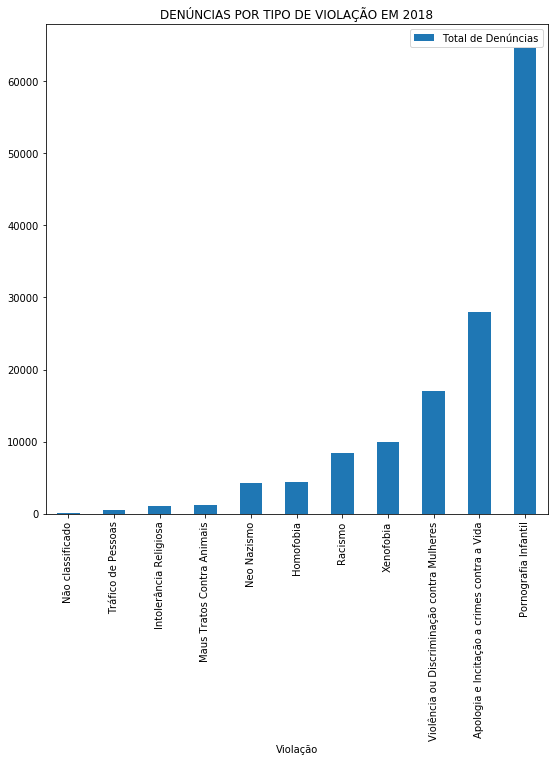

In [47]:
violacao_2018.plot.bar(x = 'Violação', y = 'Total de Denúncias',  
                       title='DENÚNCIAS POR TIPO DE VIOLAÇÃO EM 2018')

In [48]:
violacao_agrupada_ano.to_csv('../dados/violacao_agrupado_ano.csv', index=False)


### 3.2 - Domínios das páginas denunciadas



In [49]:
dominio_agrupado_ano = dominio[['Total de Denúncias', 'Ano', 'Domínio']].groupby(['Ano', 'Domínio']).sum().reset_index()
dominio_agrupado_ano.head()

,Ano,Domínio,Total de Denúncias
0,2006,0bbs.jp,4
1,2006,3.122,23
2,2006,c700.com,12
3,2006,coredump.cx,17
4,2006,cutelitt.com,27


In [50]:
dominio_2018 = dominio_agrupado_ano.loc[dominio_agrupado_ano['Ano'] == 2018].sort_values('Total de Denúncias')
dominio_2018

,Ano,Domínio,Total de Denúncias
428,2018,4shared.com,39
435,2018,jpg4.club,46
440,2018,openload.co,46
439,2018,off-cams.com,52
430,2018,google.com,76
438,2018,nnhoney.com,80
448,2018,vk.com,86
427,2018,155chan.top,101
436,2018,mail.ru,116
449,2018,whatsapp.com,160


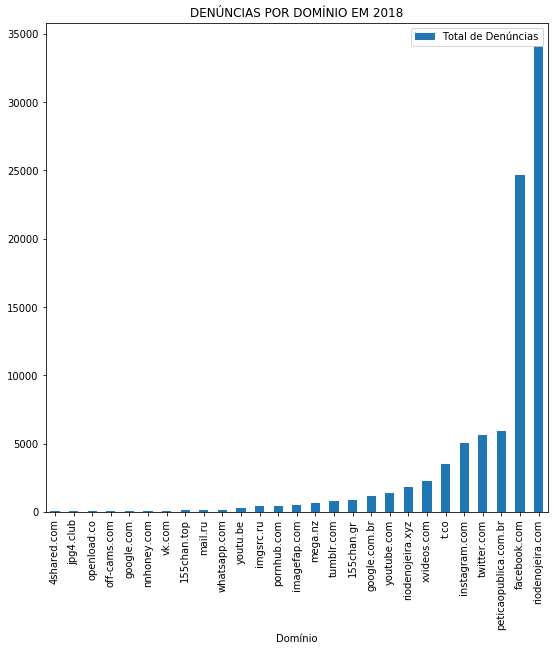

In [51]:
dominio_2018.plot.bar(x = 'Domínio', y = 'Total de Denúncias', title='DENÚNCIAS POR DOMÍNIO EM 2018')

In [52]:
dominio_agrupado_ano.to_csv('../dados/dominio_agrupado_ano.csv', index=False)

### 3.3 - Idiomas das Denúncias

In [53]:
idioma_agrupado_ano = idioma[['Total de Denúncias', 'Ano', 'Idioma']].groupby(['Ano', 'Idioma']).sum().reset_index()
idioma_agrupado_ano.head()

,Ano,Idioma,Total de Denúncias
0,2006,dutch,55
1,2006,english,7943
2,2006,farsi,9
3,2006,french,95
4,2006,german,12


In [54]:
idioma_2018 = idioma_agrupado_ano.loc[idioma_agrupado_ano['Ano'] == 2018].sort_values('Total de Denúncias')
idioma_2018

,Ano,Idioma,Total de Denúncias
125,2018,pinyin,5
129,2018,swedish,14
122,2018,farsi,29
120,2018,dutch,47
124,2018,german,104
128,2018,spanish,938
123,2018,french,2151
127,2018,russian,9652
126,2018,portuguese,28211
121,2018,english,46012


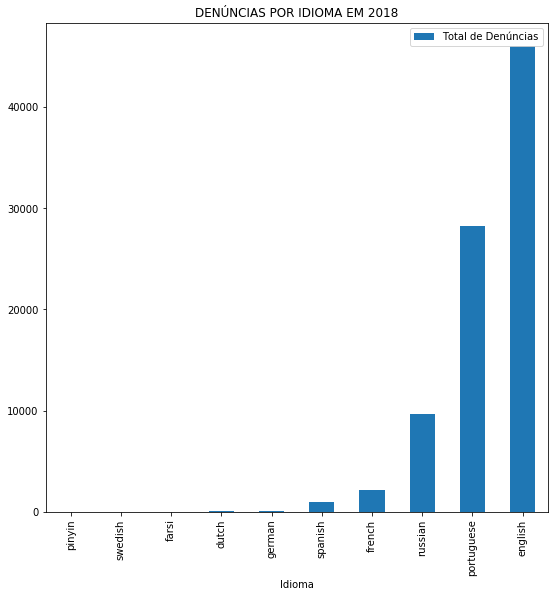

In [55]:
idioma_2018.plot.bar(x = 'Idioma', y = 'Total de Denúncias',  title='DENÚNCIAS POR IDIOMA EM 2018')

In [56]:
idioma_agrupado_ano.to_csv('../dados/idioma_agrupado_ano.csv', index=False)